In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns=None
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import roc_curve, roc_auc_score

In [39]:
df = pd.read_csv('final_features.csv')

In [40]:
df

,user_id,merchant_id,label,kind,gender,age_0,age_2,age_3,age_4,age_5,age_6,age_7,age_8,items_user,categories_user,merchants_user,brands_user,dates_user,action_types_user,periods_user,users_merchant,items_merchant,categories_merchant,brands_merchant,dates_merchant,action_types_merchant,periods_merchant,items_user_merchant,categories_user_merchant,brands_user_merchant,dates_user_merchant,action_types_user_merchant,periods_user_merchant,clicks_user,purchases_user,favourites_user,clicks_merchant,purchases_merchant,favourites_merchant,clicks_user_merchant,purchases_user_merchant,favourites_user_merchant,clicks_in_merchant_ratio_perspective,purchases_in_merchant_ratio_perspective,favourites_in_merchant_ratio_perspective,clicks_by_user_ratio_perspective,purchases_by_user_ratio_perspective,favourites_by_user_ratio_perspective,clicks_user_ratio,purchases_user_ratio,favourites_user_ratio,clicks_user_merchant_ratio,purchases_user_merchant_ratio,favourites_user_merchant_ratio,clicks_merchant_ratio,purchases_merchant_ratio,favorites_merchant_ratio,interval,clicks_user_period_max,purchases_user_period_max,favourites_user_period_max,clicks_user_period_mean,purchases_user_period_mean,favourites_user_period_mean,clicks_user_period_0,clicks_user_period_1,clicks_user_period_2,clicks_user_period_3,clicks_user_period_4,clicks_user_period_5,favourites_user_period_0,favourites_user_period_1,favourites_user_period_2,favourites_user_period_3,favourites_user_period_4,favourites_user_period_5,purchases_user_period_0,purchases_user_period_1,purchases_user_period_2,purchases_user_period_3,purchases_user_period_4,purchases_user_period_5,clicks_merchant_period_max,purchases_merchant_period_max,favourites_merchant_period_max,clicks_merchant_period_mean,purchases_merchant_period_mean,favourites_merchant_period_mean,clicks_merchant_period_0,clicks_merchant_period_1,clicks_merchant_period_2,clicks_merchant_period_3,clicks_merchant_period_4,clicks_merchant_period_5,favourites_merchant_period_0,favourites_merchant_period_1,favourites_merchant_period_2,favourites_merchant_period_3,favourites_merchant_period_4,favourites_merchant_period_5,purchases_merchant_period_0,purchases_merchant_period_1,purchases_merchant_period_2,purchases_merchant_period_3,purchases_merchant_period_4,purchases_merchant_period_5,clicks_user_merchant_period_0,clicks_user_merchant_period_1,clicks_user_merchant_period_2,clicks_user_merchant_period_3,clicks_user_merchant_period_4,clicks_user_merchant_period_5,favourites_user_merchant_period_0,favourites_user_merchant_period_1,favourites_user_merchant_period_2,favourites_user_merchant_period_3,favourites_user_merchant_period_4,favourites_user_merchant_period_5,purchases_user_merchant_period_0,purchases_user_merchant_period_1,purchases_user_merchant_period_2,purchases_user_merchant_period_3,purchases_user_merchant_period_4,purchases_user_merchant_period_5,double11_items_user,double11_categories_user,double11_merchants_user,double11_brands_user,double11_dates_user,double11_action_types_user,double11_periods_user,double11_users_merchant,double11_items_merchant,double11_categories_merchant,double11_brands_merchant,double11_dates_merchant,double11_action_types_merchant,double11_periods_merchant,double11_items_user_merchant,double11_categories_user_merchant,double11_brands_user_merchant,double11_dates_user_merchant,double11_action_types_user_merchant,double11_periods_user_merchant,double11_clicks_user,double11_purchases_user,double11_favourites_user,double11_clicks_merchant,double11_purchases_merchant,double11_favourites_merchant,double11_clicks_user_merchant,double11_purchases_user_merchant,double11_favourites_user_merchant
0,34944,2116,-1,train,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,227,1,1,1,39,3,3,1,1,1,1,1,1,1,0,0,310,13,11,1,0,0,1.0,0.0,0.0,0.003226,0.000000,0.000000,1.00,0.00,0.00,1.00,0.00,0.00,0.928144,0.038922,0.032934,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285,10,11,103.333333,4.333333,3.666667,

In [41]:
df=df.fillna(0)

In [42]:
df['label'] = df['label'].apply(lambda x: 0 if x == -1 else x)

In [43]:
df

,user_id,merchant_id,label,kind,gender,age_0,age_2,age_3,age_4,age_5,age_6,age_7,age_8,items_user,categories_user,merchants_user,brands_user,dates_user,action_types_user,periods_user,users_merchant,items_merchant,categories_merchant,brands_merchant,dates_merchant,action_types_merchant,periods_merchant,items_user_merchant,categories_user_merchant,brands_user_merchant,dates_user_merchant,action_types_user_merchant,periods_user_merchant,clicks_user,purchases_user,favourites_user,clicks_merchant,purchases_merchant,favourites_merchant,clicks_user_merchant,purchases_user_merchant,favourites_user_merchant,clicks_in_merchant_ratio_perspective,purchases_in_merchant_ratio_perspective,favourites_in_merchant_ratio_perspective,clicks_by_user_ratio_perspective,purchases_by_user_ratio_perspective,favourites_by_user_ratio_perspective,clicks_user_ratio,purchases_user_ratio,favourites_user_ratio,clicks_user_merchant_ratio,purchases_user_merchant_ratio,favourites_user_merchant_ratio,clicks_merchant_ratio,purchases_merchant_ratio,favorites_merchant_ratio,interval,clicks_user_period_max,purchases_user_period_max,favourites_user_period_max,clicks_user_period_mean,purchases_user_period_mean,favourites_user_period_mean,clicks_user_period_0,clicks_user_period_1,clicks_user_period_2,clicks_user_period_3,clicks_user_period_4,clicks_user_period_5,favourites_user_period_0,favourites_user_period_1,favourites_user_period_2,favourites_user_period_3,favourites_user_period_4,favourites_user_period_5,purchases_user_period_0,purchases_user_period_1,purchases_user_period_2,purchases_user_period_3,purchases_user_period_4,purchases_user_period_5,clicks_merchant_period_max,purchases_merchant_period_max,favourites_merchant_period_max,clicks_merchant_period_mean,purchases_merchant_period_mean,favourites_merchant_period_mean,clicks_merchant_period_0,clicks_merchant_period_1,clicks_merchant_period_2,clicks_merchant_period_3,clicks_merchant_period_4,clicks_merchant_period_5,favourites_merchant_period_0,favourites_merchant_period_1,favourites_merchant_period_2,favourites_merchant_period_3,favourites_merchant_period_4,favourites_merchant_period_5,purchases_merchant_period_0,purchases_merchant_period_1,purchases_merchant_period_2,purchases_merchant_period_3,purchases_merchant_period_4,purchases_merchant_period_5,clicks_user_merchant_period_0,clicks_user_merchant_period_1,clicks_user_merchant_period_2,clicks_user_merchant_period_3,clicks_user_merchant_period_4,clicks_user_merchant_period_5,favourites_user_merchant_period_0,favourites_user_merchant_period_1,favourites_user_merchant_period_2,favourites_user_merchant_period_3,favourites_user_merchant_period_4,favourites_user_merchant_period_5,purchases_user_merchant_period_0,purchases_user_merchant_period_1,purchases_user_merchant_period_2,purchases_user_merchant_period_3,purchases_user_merchant_period_4,purchases_user_merchant_period_5,double11_items_user,double11_categories_user,double11_merchants_user,double11_brands_user,double11_dates_user,double11_action_types_user,double11_periods_user,double11_users_merchant,double11_items_merchant,double11_categories_merchant,double11_brands_merchant,double11_dates_merchant,double11_action_types_merchant,double11_periods_merchant,double11_items_user_merchant,double11_categories_user_merchant,double11_brands_user_merchant,double11_dates_user_merchant,double11_action_types_user_merchant,double11_periods_user_merchant,double11_clicks_user,double11_purchases_user,double11_favourites_user,double11_clicks_merchant,double11_purchases_merchant,double11_favourites_merchant,double11_clicks_user_merchant,double11_purchases_user_merchant,double11_favourites_user_merchant
0,34944,2116,0,train,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,227,1,1,1,39,3,3,1,1,1,1,1,1,1,0,0,310,13,11,1,0,0,1.0,0.0,0.0,0.003226,0.000000,0.000000,1.00,0.00,0.00,1.00,0.00,0.00,0.928144,0.038922,0.032934,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285,10,11,103.333333,4.333333,3.666667,0

In [44]:
df_train = df[df['kind'] == 'train'].drop(['kind'], axis=1)
df_test = df[df['kind'] == 'test'].drop(['kind', 'label'], axis=1)

In [45]:
df_train.head()

,user_id,merchant_id,label,gender,age_0,age_2,age_3,age_4,age_5,age_6,age_7,age_8,items_user,categories_user,merchants_user,brands_user,dates_user,action_types_user,periods_user,users_merchant,items_merchant,categories_merchant,brands_merchant,dates_merchant,action_types_merchant,periods_merchant,items_user_merchant,categories_user_merchant,brands_user_merchant,dates_user_merchant,action_types_user_merchant,periods_user_merchant,clicks_user,purchases_user,favourites_user,clicks_merchant,purchases_merchant,favourites_merchant,clicks_user_merchant,purchases_user_merchant,favourites_user_merchant,clicks_in_merchant_ratio_perspective,purchases_in_merchant_ratio_perspective,favourites_in_merchant_ratio_perspective,clicks_by_user_ratio_perspective,purchases_by_user_ratio_perspective,favourites_by_user_ratio_perspective,clicks_user_ratio,purchases_user_ratio,favourites_user_ratio,clicks_user_merchant_ratio,purchases_user_merchant_ratio,favourites_user_merchant_ratio,clicks_merchant_ratio,purchases_merchant_ratio,favorites_merchant_ratio,interval,clicks_user_period_max,purchases_user_period_max,favourites_user_period_max,clicks_user_period_mean,purchases_user_period_mean,favourites_user_period_mean,clicks_user_period_0,clicks_user_period_1,clicks_user_period_2,clicks_user_period_3,clicks_user_period_4,clicks_user_period_5,favourites_user_period_0,favourites_user_period_1,favourites_user_period_2,favourites_user_period_3,favourites_user_period_4,favourites_user_period_5,purchases_user_period_0,purchases_user_period_1,purchases_user_period_2,purchases_user_period_3,purchases_user_period_4,purchases_user_period_5,clicks_merchant_period_max,purchases_merchant_period_max,favourites_merchant_period_max,clicks_merchant_period_mean,purchases_merchant_period_mean,favourites_merchant_period_mean,clicks_merchant_period_0,clicks_merchant_period_1,clicks_merchant_period_2,clicks_merchant_period_3,clicks_merchant_period_4,clicks_merchant_period_5,favourites_merchant_period_0,favourites_merchant_period_1,favourites_merchant_period_2,favourites_merchant_period_3,favourites_merchant_period_4,favourites_merchant_period_5,purchases_merchant_period_0,purchases_merchant_period_1,purchases_merchant_period_2,purchases_merchant_period_3,purchases_merchant_period_4,purchases_merchant_period_5,clicks_user_merchant_period_0,clicks_user_merchant_period_1,clicks_user_merchant_period_2,clicks_user_merchant_period_3,clicks_user_merchant_period_4,clicks_user_merchant_period_5,favourites_user_merchant_period_0,favourites_user_merchant_period_1,favourites_user_merchant_period_2,favourites_user_merchant_period_3,favourites_user_merchant_period_4,favourites_user_merchant_period_5,purchases_user_merchant_period_0,purchases_user_merchant_period_1,purchases_user_merchant_period_2,purchases_user_merchant_period_3,purchases_user_merchant_period_4,purchases_user_merchant_period_5,double11_items_user,double11_categories_user,double11_merchants_user,double11_brands_user,double11_dates_user,double11_action_types_user,double11_periods_user,double11_users_merchant,double11_items_merchant,double11_categories_merchant,double11_brands_merchant,double11_dates_merchant,double11_action_types_merchant,double11_periods_merchant,double11_items_user_merchant,double11_categories_user_merchant,double11_brands_user_merchant,double11_dates_user_merchant,double11_action_types_user_merchant,double11_periods_user_merchant,double11_clicks_user,double11_purchases_user,double11_favourites_user,double11_clicks_merchant,double11_purchases_merchant,double11_favourites_merchant,double11_clicks_user_merchant,double11_purchases_user_merchant,double11_favourites_user_merchant
0,34944,2116,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,227,1,1,1,39,3,3,1,1,1,1,1,1,1,0,0,310,13,11,1,0,0,1.0,0.0,0.0,0.003226,0.000000,0.0,1.00,0.00,0.0,1.00,0.00,0.0,0.928144,0.038922,0.032934,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285,10,11,103.333333,4.333333,3.666667,0.0,0.0,0.0,1.0,24.

In [46]:
X = df_train.drop(['label'],axis=1)

In [47]:
y= df_train['label']

## Feature ranking using Random forest

###### Note: We will be using the same features for all the  models, without performing seperate FR w.r.t to all all the models

In [48]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)

In [49]:
rf.fit(X, y)

RandomForestRegressor(random_state=0)

In [50]:
importances = rf.feature_importances_

In [51]:
feature_names=X.columns 

In [52]:
indices = np.argsort(importances)[::-1]

In [53]:
lis = []

In [54]:
for f in range(X.shape[1]):
    if (f<30):
        lis.append(feature_names[indices[f]])

In [55]:
lis

['user_id',
 'age_7',
 'clicks_user_period_5',
 'favourites_user_merchant_ratio',
 'clicks_user_merchant_period_5',
 'clicks_user_ratio',
 'clicks_user_merchant_ratio',
 'double11_purchases_user_merchant',
 'action_types_user_merchant',
 'double11_purchases_user',
 'favourites_user_ratio',
 'action_types_user',
 'clicks_merchant_period_mean',
 'clicks_user',
 'clicks_merchant',
 'clicks_merchant_period_3',
 'users_merchant',
 'gender',
 'clicks_merchant_period_2',
 'favourites_merchant_period_4',
 'double11_clicks_user',
 'favourites_merchant_period_5',
 'clicks_merchant_period_4',
 'double11_clicks_user_merchant',
 'purchases_merchant_ratio',
 'clicks_user_period_mean',
 'double11_brands_merchant',
 'clicks_user_period_max',
 'clicks_merchant_ratio',
 'clicks_user_merchant']

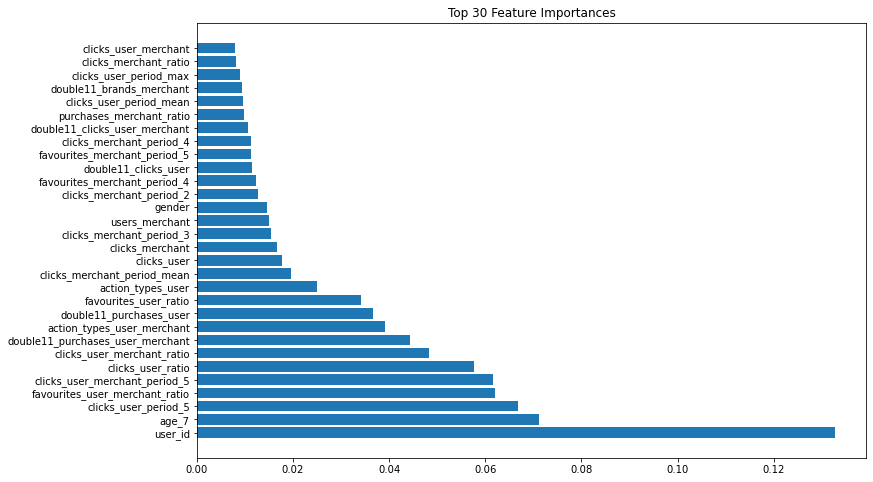

In [56]:
plt.figure(figsize=(12, 8))
plt.title("Top 30 Feature Importances")
plt.barh(range(30), importances[indices][:30])
plt.yticks(range(30), feature_names[indices][:30])
plt.show()

In [57]:
lis.insert(0,'label')

In [58]:
lis.insert(1,'kind')

In [59]:
new_df = df[lis]

In [60]:
new_df

,label,kind,user_id,age_7,clicks_user_period_5,favourites_user_merchant_ratio,clicks_user_merchant_period_5,clicks_user_ratio,clicks_user_merchant_ratio,double11_purchases_user_merchant,action_types_user_merchant,double11_purchases_user,favourites_user_ratio,action_types_user,clicks_merchant_period_mean,clicks_user,clicks_merchant,clicks_merchant_period_3,users_merchant,gender,clicks_merchant_period_2,favourites_merchant_period_4,double11_clicks_user,favourites_merchant_period_5,clicks_merchant_period_4,double11_clicks_user_merchant,purchases_merchant_ratio,clicks_user_period_mean,double11_brands_merchant,clicks_user_period_max,clicks_merchant_ratio,clicks_user_merchant
0,0,train,34944,0,1.0,0.00,1.0,1.00,1.00,0.0,1,0.0,0.00,1,103.333333,1,310,1.0,227,0,0.0,0.0,0.0,11.0,24.0,0.0,0.038922,1.0,1.0,1,0.928144,1
1,0,train,252288,0,0.0,0.00,0.0,1.00,1.00,0.0,1,0.0,0.00,1,79.200000,1,396,170.0,308,0,93.0,3.0,0.0,0.0,75.0,0.0,0.009569,1.0,1.0,1,0.947368,1
2,0,train,210048,0,0.0,0.00,0.0,0.75,0.75,0.0,2,0.0,0.00,2,570.200000,3,2851,1130.0,1309,1,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,3.0,1.0,3,0.752839,3
3,0,train,210048,0,0.0,0.00,0.0,0.75,0.75,0.0,2,0.0,0.00,2,570.200000,3,2851,1130.0,1309,1,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,3.0,1.0,3,0.752839,3
4,0,train,210048,0,0.0,0.00,0.0,0.75,0.75,0.0,2,0.0,0.00,2,570.200000,3,2851,1130.0,1309,1,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,3.0,1.0,3,0.752839,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9157,0,test,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3
9158,0,test,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3
9159,0,test,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3
9160,0,test,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3


## PCA

In [61]:
VALID_SET_SIZE = 0.2
PCA_COMPONENTS = 5
RANDOM_SEED = 42
N_FEATURES = 150

In [62]:
pca_df = new_df.drop(['kind', 'label'], axis=1)
pca = PCA(n_components=PCA_COMPONENTS)
pca.fit(pca_df)
new_df = new_df.join(pd.DataFrame(pca.transform(pca_df), index=pca_df.index).add_prefix('pca_'))

In [63]:
new_df

,label,kind,user_id,age_7,clicks_user_period_5,favourites_user_merchant_ratio,clicks_user_merchant_period_5,clicks_user_ratio,clicks_user_merchant_ratio,double11_purchases_user_merchant,action_types_user_merchant,double11_purchases_user,favourites_user_ratio,action_types_user,clicks_merchant_period_mean,clicks_user,clicks_merchant,clicks_merchant_period_3,users_merchant,gender,clicks_merchant_period_2,favourites_merchant_period_4,double11_clicks_user,favourites_merchant_period_5,clicks_merchant_period_4,double11_clicks_user_merchant,purchases_merchant_ratio,clicks_user_period_mean,double11_brands_merchant,clicks_user_period_max,clicks_merchant_ratio,clicks_user_merchant,pca_0,pca_1,pca_2,pca_3,pca_4
0,0,train,34944,0,1.0,0.00,1.0,1.00,1.00,0.0,1,0.0,0.00,1,103.333333,1,310,1.0,227,0,0.0,0.0,0.0,11.0,24.0,0.0,0.038922,1.0,1.0,1,0.928144,1,179809.853268,-1161.490237,86.274357,-26.015718,-58.593016
1,0,train,252288,0,0.0,0.00,0.0,1.00,1.00,0.0,1,0.0,0.00,1,79.200000,1,396,170.0,308,0,93.0,3.0,0.0,0.0,75.0,0.0,0.009569,1.0,1.0,1,0.947368,1,-37534.202952,-1080.023995,16.292373,-62.564395,71.833114
2,0,train,210048,0,0.0,0.00,0.0,0.75,0.75,0.0,2,0.0,0.00,2,570.200000,3,2851,1130.0,1309,1,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,3.0,1.0,3,0.752839,3,4704.527737,1869.092427,-4.885476,-0.117259,-1.005429
3,0,train,210048,0,0.0,0.00,0.0,0.75,0.75,0.0,2,0.0,0.00,2,570.200000,3,2851,1130.0,1309,1,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,3.0,1.0,3,0.752839,3,4704.527737,1869.092427,-4.885476,-0.117259,-1.005429
4,0,train,210048,0,0.0,0.00,0.0,0.75,0.75,0.0,2,0.0,0.00,2,570.200000,3,2851,1130.0,1309,1,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,3.0,1.0,3,0.752839,3,4704.527737,1869.092427,-4.885476,-0.117259,-1.005429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9157,0,test,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494
9158,0,test,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494
9159,0,test,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494
9160,0,test,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494


In [64]:
del df_train
del df_test

### Split Train Test

In [65]:
df_train = new_df[new_df['kind'] == 'train'].drop(['kind'], axis=1)
df_test = new_df[new_df['kind'] == 'test'].drop(['kind', 'label'], axis=1)

In [66]:
df_train

,label,user_id,age_7,clicks_user_period_5,favourites_user_merchant_ratio,clicks_user_merchant_period_5,clicks_user_ratio,clicks_user_merchant_ratio,double11_purchases_user_merchant,action_types_user_merchant,double11_purchases_user,favourites_user_ratio,action_types_user,clicks_merchant_period_mean,clicks_user,clicks_merchant,clicks_merchant_period_3,users_merchant,gender,clicks_merchant_period_2,favourites_merchant_period_4,double11_clicks_user,favourites_merchant_period_5,clicks_merchant_period_4,double11_clicks_user_merchant,purchases_merchant_ratio,clicks_user_period_mean,double11_brands_merchant,clicks_user_period_max,clicks_merchant_ratio,clicks_user_merchant,pca_0,pca_1,pca_2,pca_3,pca_4
0,0,34944,0,1.0,0.0,1.0,1.000000,1.000000,0.0,1,0.0,0.0,1,103.333333,1,310,1.0,227,0,0.0,0.0,0.0,11.0,24.0,0.0,0.038922,1.0,1.0,1,0.928144,1,179809.853268,-1161.490237,86.274357,-26.015718,-58.593016
1,0,252288,0,0.0,0.0,0.0,1.000000,1.000000,0.0,1,0.0,0.0,1,79.200000,1,396,170.0,308,0,93.0,3.0,0.0,0.0,75.0,0.0,0.009569,1.0,1.0,1,0.947368,1,-37534.202952,-1080.023995,16.292373,-62.564395,71.833114
2,0,210048,0,0.0,0.0,0.0,0.750000,0.750000,0.0,2,0.0,0.0,2,570.200000,3,2851,1130.0,1309,1,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,3.0,1.0,3,0.752839,3,4704.527737,1869.092427,-4.885476,-0.117259,-1.005429
3,0,210048,0,0.0,0.0,0.0,0.750000,0.750000,0.0,2,0.0,0.0,2,570.200000,3,2851,1130.0,1309,1,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,3.0,1.0,3,0.752839,3,4704.527737,1869.092427,-4.885476,-0.117259,-1.005429
4,0,210048,0,0.0,0.0,0.0,0.750000,0.750000,0.0,2,0.0,0.0,2,570.200000,3,2851,1130.0,1309,1,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,3.0,1.0,3,0.752839,3,4704.527737,1869.092427,-4.885476,-0.117259,-1.005429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,0,230015,0,0.0,0.0,0.0,0.666667,0.666667,0.0,2,0.0,0.0,2,570.200000,2,2851,1130.0,1309,0,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,2.0,1.0,2,0.752839,2,-15262.470394,1860.469506,-4.678381,-0.135083,-0.974028
4632,0,230015,0,0.0,0.0,0.0,0.666667,0.666667,0.0,2,0.0,0.0,2,570.200000,2,2851,1130.0,1309,0,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,2.0,1.0,2,0.752839,2,-15262.470394,1860.469506,-4.678381,-0.135083,-0.974028
4633,0,64895,0,0.0,0.0,0.0,1.000000,1.000000,0.0,1,0.0,0.0,1,20.000000,1,40,0.0,39,0,0.0,0.0,0.0,0.0,0.0,0.0,0.046512,1.0,0.0,1,0.930233,1,149858.986340,-1479.575223,-55.816689,-9.282984,-12.504386
4634,0,5759,0,0.0,0.0,0.0,0.000000,0.000000,0.0,1,0.0,0.0,1,570.200000,0,2851,1130.0,1309,0,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,0.0,1.0,0,0.752839,0,208993.508712,1957.272345,-6.924563,-0.244320,-0.750526


In [67]:
df_test

,user_id,age_7,clicks_user_period_5,favourites_user_merchant_ratio,clicks_user_merchant_period_5,clicks_user_ratio,clicks_user_merchant_ratio,double11_purchases_user_merchant,action_types_user_merchant,double11_purchases_user,favourites_user_ratio,action_types_user,clicks_merchant_period_mean,clicks_user,clicks_merchant,clicks_merchant_period_3,users_merchant,gender,clicks_merchant_period_2,favourites_merchant_period_4,double11_clicks_user,favourites_merchant_period_5,clicks_merchant_period_4,double11_clicks_user_merchant,purchases_merchant_ratio,clicks_user_period_mean,double11_brands_merchant,clicks_user_period_max,clicks_merchant_ratio,clicks_user_merchant,pca_0,pca_1,pca_2,pca_3,pca_4
4636,64128,0,0.0,0.00,0.0,1.00,1.00,0.0,1,0.0,0.00,1,570.200000,1,2851,1130.0,1309,1,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,1.0,1.0,1,0.752839,1,150624.514147,1932.078129,-6.342981,-0.204365,-0.828412
4637,18816,0,0.0,0.00,0.0,1.00,1.00,0.0,1,0.0,0.00,1,49.600000,1,248,48.0,159,1,49.0,0.0,0.0,1.0,21.0,0.0,0.125000,1.0,0.0,1,0.815789,1,195937.875858,-1212.552444,-8.231880,-3.074206,-6.197004
4638,403329,0,0.0,0.00,0.0,1.00,1.00,0.0,1,0.0,0.00,1,34.400000,1,172,34.0,121,0,76.0,0.0,0.0,0.0,3.0,0.0,0.011111,1.0,0.0,1,0.955556,1,-188575.054755,-1456.918593,-32.035945,29.514069,17.190906
4639,279681,0,0.0,0.00,0.0,1.00,1.00,0.0,1,0.0,0.00,1,5.400000,1,27,3.0,12,0,3.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,1,0.931034,1,-64926.984689,-1593.498656,-75.830243,-4.227555,-12.730230
4640,217473,0,1.0,0.00,1.0,1.00,1.00,0.0,1,0.0,0.00,1,103.333333,1,310,1.0,227,0,0.0,0.0,1.0,11.0,24.0,1.0,0.038922,1.0,1.0,1,0.928144,1,-2719.129714,-1240.286722,88.111484,-25.966172,-58.708335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9157,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494
9158,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494
9159,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494
9160,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494


## Downsampling

In [68]:
import pandas as pd
from sklearn.utils import resample

In [69]:
# Separate majority and minority classes
df_majority = df_train[df_train.label==0]
df_minority = df_train[df_train.label==1]

In [70]:
df_majority

,label,user_id,age_7,clicks_user_period_5,favourites_user_merchant_ratio,clicks_user_merchant_period_5,clicks_user_ratio,clicks_user_merchant_ratio,double11_purchases_user_merchant,action_types_user_merchant,double11_purchases_user,favourites_user_ratio,action_types_user,clicks_merchant_period_mean,clicks_user,clicks_merchant,clicks_merchant_period_3,users_merchant,gender,clicks_merchant_period_2,favourites_merchant_period_4,double11_clicks_user,favourites_merchant_period_5,clicks_merchant_period_4,double11_clicks_user_merchant,purchases_merchant_ratio,clicks_user_period_mean,double11_brands_merchant,clicks_user_period_max,clicks_merchant_ratio,clicks_user_merchant,pca_0,pca_1,pca_2,pca_3,pca_4
0,0,34944,0,1.0,0.0,1.0,1.000000,1.000000,0.0,1,0.0,0.0,1,103.333333,1,310,1.0,227,0,0.0,0.0,0.0,11.0,24.0,0.0,0.038922,1.0,1.0,1,0.928144,1,179809.853268,-1161.490237,86.274357,-26.015718,-58.593016
1,0,252288,0,0.0,0.0,0.0,1.000000,1.000000,0.0,1,0.0,0.0,1,79.200000,1,396,170.0,308,0,93.0,3.0,0.0,0.0,75.0,0.0,0.009569,1.0,1.0,1,0.947368,1,-37534.202952,-1080.023995,16.292373,-62.564395,71.833114
2,0,210048,0,0.0,0.0,0.0,0.750000,0.750000,0.0,2,0.0,0.0,2,570.200000,3,2851,1130.0,1309,1,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,3.0,1.0,3,0.752839,3,4704.527737,1869.092427,-4.885476,-0.117259,-1.005429
3,0,210048,0,0.0,0.0,0.0,0.750000,0.750000,0.0,2,0.0,0.0,2,570.200000,3,2851,1130.0,1309,1,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,3.0,1.0,3,0.752839,3,4704.527737,1869.092427,-4.885476,-0.117259,-1.005429
4,0,210048,0,0.0,0.0,0.0,0.750000,0.750000,0.0,2,0.0,0.0,2,570.200000,3,2851,1130.0,1309,1,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,3.0,1.0,3,0.752839,3,4704.527737,1869.092427,-4.885476,-0.117259,-1.005429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,0,230015,0,0.0,0.0,0.0,0.666667,0.666667,0.0,2,0.0,0.0,2,570.200000,2,2851,1130.0,1309,0,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,2.0,1.0,2,0.752839,2,-15262.470394,1860.469506,-4.678381,-0.135083,-0.974028
4632,0,230015,0,0.0,0.0,0.0,0.666667,0.666667,0.0,2,0.0,0.0,2,570.200000,2,2851,1130.0,1309,0,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,2.0,1.0,2,0.752839,2,-15262.470394,1860.469506,-4.678381,-0.135083,-0.974028
4633,0,64895,0,0.0,0.0,0.0,1.000000,1.000000,0.0,1,0.0,0.0,1,20.000000,1,40,0.0,39,0,0.0,0.0,0.0,0.0,0.0,0.0,0.046512,1.0,0.0,1,0.930233,1,149858.986340,-1479.575223,-55.816689,-9.282984,-12.504386
4634,0,5759,0,0.0,0.0,0.0,0.000000,0.000000,0.0,1,0.0,0.0,1,570.200000,0,2851,1130.0,1309,0,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,0.0,1.0,0,0.752839,0,208993.508712,1957.272345,-6.924563,-0.244320,-0.750526


In [71]:
df_minority

,label,user_id,age_7,clicks_user_period_5,favourites_user_merchant_ratio,clicks_user_merchant_period_5,clicks_user_ratio,clicks_user_merchant_ratio,double11_purchases_user_merchant,action_types_user_merchant,double11_purchases_user,favourites_user_ratio,action_types_user,clicks_merchant_period_mean,clicks_user,clicks_merchant,clicks_merchant_period_3,users_merchant,gender,clicks_merchant_period_2,favourites_merchant_period_4,double11_clicks_user,favourites_merchant_period_5,clicks_merchant_period_4,double11_clicks_user_merchant,purchases_merchant_ratio,clicks_user_period_mean,double11_brands_merchant,clicks_user_period_max,clicks_merchant_ratio,clicks_user_merchant,pca_0,pca_1,pca_2,pca_3,pca_4
490,1,351189,0,1.0,0.000000,1.0,1.000000,1.000000,0.0,1,0.0,0.000000,1,15.833333,1,95,13.0,59,1,7.0,1.0,1.0,3.0,5.0,1.0,0.029412,1.0,2.0,1,0.931373,1,-136435.011920,-1545.201884,-47.785396,-9.052565,-16.104974
672,1,371697,1,4.0,0.000000,4.0,0.800000,0.800000,1.0,2,1.0,0.000000,2,79.200000,4,396,170.0,308,0,93.0,3.0,4.0,0.0,75.0,4.0,0.009569,4.0,1.0,4,0.947368,4,-156943.191841,-1131.563791,17.477003,-62.520082,71.513421
673,1,371697,1,4.0,0.000000,4.0,0.800000,0.800000,1.0,2,1.0,0.000000,2,79.200000,4,396,170.0,308,0,93.0,3.0,4.0,0.0,75.0,4.0,0.009569,4.0,1.0,4,0.947368,4,-156943.191841,-1131.563791,17.477003,-62.520082,71.513421
674,1,371697,1,4.0,0.000000,4.0,0.800000,0.800000,1.0,2,1.0,0.000000,2,79.200000,4,396,170.0,308,0,93.0,3.0,4.0,0.0,75.0,4.0,0.009569,4.0,1.0,4,0.947368,4,-156943.191841,-1131.563791,17.477003,-62.520082,71.513421
675,1,371697,1,4.0,0.000000,4.0,0.800000,0.800000,1.0,2,1.0,0.000000,2,79.200000,4,396,170.0,308,0,93.0,3.0,4.0,0.0,75.0,4.0,0.009569,4.0,1.0,4,0.947368,4,-156943.191841,-1131.563791,17.477003,-62.520082,71.513421
676,1,371697,1,4.0,0.000000,4.0,0.800000,0.800000,1.0,2,1.0,0.000000,2,79.200000,4,396,170.0,308,0,93.0,3.0,4.0,0.0,75.0,4.0,0.009569,4.0,1.0,4,0.947368,4,-156943.191841,-1131.563791,17.477003,-62.520082,71.513421
1044,1,46125,0,0.0,0.000000,0.0,1.000000,1.000000,0.0,1,0.0,0.000000,1,2.333333,1,7,4.0,6,2,0.0,0.0,0.0,0.0,2.0,0.0,0.000000,1.0,0.0,1,1.000000,1,168629.001858,-1512.072441,-82.616488,-8.923359,-6.497594
1213,1,84300,0,2.0,0.333333,2.0,0.666667,0.666667,0.0,2,0.0,0.333333,2,15.833333,2,95,13.0,59,1,7.0,1.0,0.0,3.0,5.0,0.0,0.029412,2.0,2.0,2,0.931373,2,130453.963189,-1429.984630,-50.477078,-9.114357,-16.008192
1214,1,84300,0,2.0,0.333333,2.0,0.666667,0.666667,0.0,2,0.0,0.333333,2,15.833333,2,95,13.0,59,1,7.0,1.0,0.0,3.0,5.0,0.0,0.029412,2.0,2.0,2,0.931373,2,130453.963189,-1429.984630,-50.477078,-9.114357,-16.008192
1215,1,84300,0,2.0,0.333333,2.0,0.666667,0.666667,0.0,2,0.0,0.333333,2,15.833333,2,95,13.0,59,1,7.0,1.0,0.0,3.0,5.0,0.0,0.029412,2.0,2.0,2,0.931373,2,130453.963189,-1429.984630,-50.477078,-9.114357,-16.008192


In [72]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority)*3, # to have the same number of samples as the minority class
                                   random_state=42)  # reproducible results

In [73]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [74]:
# Display class counts before and after downsampling
print('Original class distribution:\n', new_df.label.value_counts())
print('Downsampled class distribution:\n', df_downsampled.label.value_counts())

Original class distribution:
 0    9139
1      23
Name: label, dtype: int64
Downsampled class distribution:
 0    69
1    23
Name: label, dtype: int64


In [75]:
# Use the downsampled dataframe for training
X_train = df_downsampled.drop('label', axis=1)
y_train = df_downsampled['label']

## Model Random Forest

In [76]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_downsampled.drop('label', axis=1), 
                                                    df_downsampled['label'], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [77]:
# Train a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

### Model Eval with RF

In [79]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 89.47%


In [80]:
# Print classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.60      1.00      0.75         3

    accuracy                           0.89        19
   macro avg       0.80      0.94      0.84        19
weighted avg       0.94      0.89      0.90        19



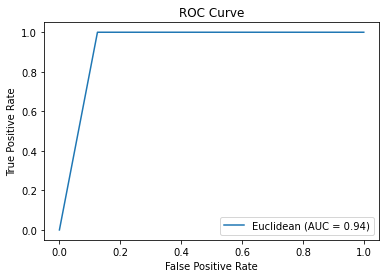

In [81]:
# Calculate the false positive rate, true positive rate, and thresholds for each classifier
fpr_euclidean, tpr_euclidean, thresholds_euclidean = roc_curve(y_test, y_pred)
# Calculate the AUC score for each classifier
auc_euclidean = roc_auc_score(y_test, y_pred)
# Plot the ROC curves for each classifier
plt.plot(fpr_euclidean, tpr_euclidean, label='Euclidean (AUC = {:.2f})'.format(auc_euclidean))
# Add labels and legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Show the plot
plt.show()

### Predictions on test data with RF

In [82]:
# Make predictions on the test set
y_pred = rf_clf.predict(df_test)

In [83]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
df_test['pred']=y_pred

In [85]:
df_test

,user_id,age_7,clicks_user_period_5,favourites_user_merchant_ratio,clicks_user_merchant_period_5,clicks_user_ratio,clicks_user_merchant_ratio,double11_purchases_user_merchant,action_types_user_merchant,double11_purchases_user,favourites_user_ratio,action_types_user,clicks_merchant_period_mean,clicks_user,clicks_merchant,clicks_merchant_period_3,users_merchant,gender,clicks_merchant_period_2,favourites_merchant_period_4,double11_clicks_user,favourites_merchant_period_5,clicks_merchant_period_4,double11_clicks_user_merchant,purchases_merchant_ratio,clicks_user_period_mean,double11_brands_merchant,clicks_user_period_max,clicks_merchant_ratio,clicks_user_merchant,pca_0,pca_1,pca_2,pca_3,pca_4,pred
4636,64128,0,0.0,0.00,0.0,1.00,1.00,0.0,1,0.0,0.00,1,570.200000,1,2851,1130.0,1309,1,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,1.0,1.0,1,0.752839,1,150624.514147,1932.078129,-6.342981,-0.204365,-0.828412,0
4637,18816,0,0.0,0.00,0.0,1.00,1.00,0.0,1,0.0,0.00,1,49.600000,1,248,48.0,159,1,49.0,0.0,0.0,1.0,21.0,0.0,0.125000,1.0,0.0,1,0.815789,1,195937.875858,-1212.552444,-8.231880,-3.074206,-6.197004,0
4638,403329,0,0.0,0.00,0.0,1.00,1.00,0.0,1,0.0,0.00,1,34.400000,1,172,34.0,121,0,76.0,0.0,0.0,0.0,3.0,0.0,0.011111,1.0,0.0,1,0.955556,1,-188575.054755,-1456.918593,-32.035945,29.514069,17.190906,0
4639,279681,0,0.0,0.00,0.0,1.00,1.00,0.0,1,0.0,0.00,1,5.400000,1,27,3.0,12,0,3.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,1,0.931034,1,-64926.984689,-1593.498656,-75.830243,-4.227555,-12.730230,0
4640,217473,0,1.0,0.00,1.0,1.00,1.00,0.0,1,0.0,0.00,1,103.333333,1,310,1.0,227,0,0.0,0.0,1.0,11.0,24.0,1.0,0.038922,1.0,1.0,1,0.928144,1,-2719.129714,-1240.286722,88.111484,-25.966172,-58.708335,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9157,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494,0
9158,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494,0
9159,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494,0
9160,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494,0


In [86]:
df_test.to_csv('rf_prediction.csv',index=False)

In [87]:
df_test.drop('pred', axis=1, inplace=True)

In [88]:
df_test

,user_id,age_7,clicks_user_period_5,favourites_user_merchant_ratio,clicks_user_merchant_period_5,clicks_user_ratio,clicks_user_merchant_ratio,double11_purchases_user_merchant,action_types_user_merchant,double11_purchases_user,favourites_user_ratio,action_types_user,clicks_merchant_period_mean,clicks_user,clicks_merchant,clicks_merchant_period_3,users_merchant,gender,clicks_merchant_period_2,favourites_merchant_period_4,double11_clicks_user,favourites_merchant_period_5,clicks_merchant_period_4,double11_clicks_user_merchant,purchases_merchant_ratio,clicks_user_period_mean,double11_brands_merchant,clicks_user_period_max,clicks_merchant_ratio,clicks_user_merchant,pca_0,pca_1,pca_2,pca_3,pca_4
4636,64128,0,0.0,0.00,0.0,1.00,1.00,0.0,1,0.0,0.00,1,570.200000,1,2851,1130.0,1309,1,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,1.0,1.0,1,0.752839,1,150624.514147,1932.078129,-6.342981,-0.204365,-0.828412
4637,18816,0,0.0,0.00,0.0,1.00,1.00,0.0,1,0.0,0.00,1,49.600000,1,248,48.0,159,1,49.0,0.0,0.0,1.0,21.0,0.0,0.125000,1.0,0.0,1,0.815789,1,195937.875858,-1212.552444,-8.231880,-3.074206,-6.197004
4638,403329,0,0.0,0.00,0.0,1.00,1.00,0.0,1,0.0,0.00,1,34.400000,1,172,34.0,121,0,76.0,0.0,0.0,0.0,3.0,0.0,0.011111,1.0,0.0,1,0.955556,1,-188575.054755,-1456.918593,-32.035945,29.514069,17.190906
4639,279681,0,0.0,0.00,0.0,1.00,1.00,0.0,1,0.0,0.00,1,5.400000,1,27,3.0,12,0,3.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,1,0.931034,1,-64926.984689,-1593.498656,-75.830243,-4.227555,-12.730230
4640,217473,0,1.0,0.00,1.0,1.00,1.00,0.0,1,0.0,0.00,1,103.333333,1,310,1.0,227,0,0.0,0.0,1.0,11.0,24.0,1.0,0.038922,1.0,1.0,1,0.928144,1,-2719.129714,-1240.286722,88.111484,-25.966172,-58.708335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9157,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494
9158,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494
9159,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494
9160,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494


# KNN

In [89]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [90]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9473684210526315


### Grid Search

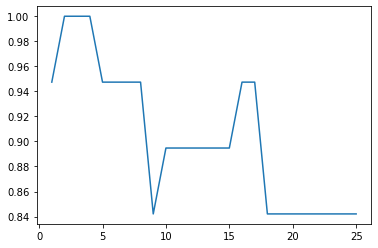

In [91]:
k_range = list(range(1, 26))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.show()

### cross validation : KNN

In [92]:
kf = KFold(n_splits=5, shuffle=False).split(range(25))

In [93]:
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [94]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(scores)

[0.625      0.875      0.75       1.         0.85714286 0.71428571
 0.85714286 0.42857143 0.57142857 1.        ]


### KNN using three different distance measures

In [95]:
X_train

,user_id,age_7,clicks_user_period_5,favourites_user_merchant_ratio,clicks_user_merchant_period_5,clicks_user_ratio,clicks_user_merchant_ratio,double11_purchases_user_merchant,action_types_user_merchant,double11_purchases_user,favourites_user_ratio,action_types_user,clicks_merchant_period_mean,clicks_user,clicks_merchant,clicks_merchant_period_3,users_merchant,gender,clicks_merchant_period_2,favourites_merchant_period_4,double11_clicks_user,favourites_merchant_period_5,clicks_merchant_period_4,double11_clicks_user_merchant,purchases_merchant_ratio,clicks_user_period_mean,double11_brands_merchant,clicks_user_period_max,clicks_merchant_ratio,clicks_user_merchant,pca_0,pca_1,pca_2,pca_3,pca_4
1580,370825,0,2.0,0.000000,2.0,1.000000,1.000000,0.0,1,0.0,0.000000,1,62.400000,2,312,63.0,237,0,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,2.0,1.0,2,0.923077,2,-156071.140129,-1251.162108,12.784083,74.601424,63.728960
2165,109558,1,0.0,0.000000,0.0,0.500000,0.500000,0.0,2,0.0,0.000000,2,570.200000,3,2851,1130.0,1309,0,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,1.5,1.0,3,0.752839,3,105194.518370,1912.472393,-5.896787,-0.155083,-0.929874
1803,240562,0,0.0,0.000000,0.0,1.000000,1.000000,0.0,1,0.0,0.000000,1,20.000000,1,40,0.0,39,0,0.0,0.0,0.0,0.0,0.0,0.0,0.046512,1.0,0.0,1,0.930233,1,-25807.997281,-1555.409314,-54.047768,-9.232575,-12.610091
1215,84300,0,2.0,0.333333,2.0,0.666667,0.666667,0.0,2,0.0,0.333333,2,15.833333,2,95,13.0,59,1,7.0,1.0,0.0,3.0,5.0,0.0,0.029412,2.0,2.0,2,0.931373,2,130453.963189,-1429.984630,-50.477078,-9.114357,-16.008192
711,323319,0,0.0,0.000000,0.0,1.000000,1.000000,0.0,1,0.0,0.000000,1,87.000000,2,435,1.0,272,0,156.0,0.0,0.0,0.0,1.0,0.0,0.112426,2.0,0.0,2,0.857988,2,-108565.184342,-1136.639457,83.615728,107.625619,-10.382784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3683,408041,1,0.0,0.000000,0.0,1.000000,1.000000,0.0,1,0.0,0.000000,1,8.166667,1,49,8.0,39,0,2.0,0.0,0.0,1.0,9.0,0.0,0.018868,1.0,0.0,1,0.924528,1,-193286.985546,-1618.812699,-57.285231,-13.126922,-6.432497
737,102651,0,0.0,0.000000,0.0,1.000000,1.000000,0.0,1,0.0,0.000000,1,87.000000,2,435,1.0,272,0,156.0,0.0,0.0,0.0,1.0,0.0,0.112426,2.0,0.0,2,0.857988,2,112102.795084,-1041.378781,81.393658,107.562297,-10.250000
673,371697,1,4.0,0.000000,4.0,0.800000,0.800000,1.0,2,1.0,0.000000,2,79.200000,4,396,170.0,308,0,93.0,3.0,4.0,0.0,75.0,4.0,0.009569,4.0,1.0,4,0.947368,4,-156943.191841,-1131.563791,17.477003,-62.520082,71.513421
1633,66703,0,0.0,0.000000,0.0,1.000000,1.000000,0.0,1,0.0,0.000000,1,34.400000,4,172,34.0,121,0,76.0,0.0,0.0,0.0,3.0,0.0,0.011111,2.0,0.0,3,0.955556,4,148050.913841,-1311.591691,-35.441609,29.467736,17.294119


#### Manhattan

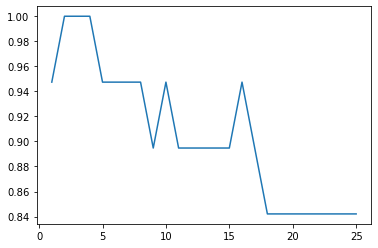

In [96]:
k_range = list(range(1, 26))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.show()

#### Cosine

In [97]:
from scipy.spatial.distance import cosine

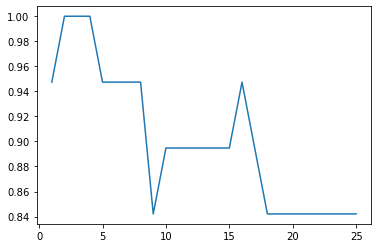

In [98]:
k_range = list(range(1, 26))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i, metric=cosine)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.show()

#### Hamming

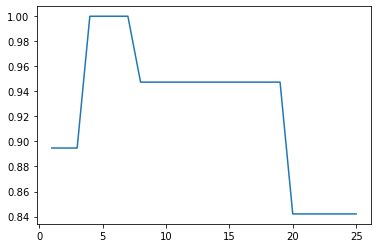

In [99]:
k_range = list(range(1, 26))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i, metric='hamming')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.show()

### Model eval : KNN

In [100]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       0.00      0.00      0.00         3

    accuracy                           0.84        19
   macro avg       0.42      0.50      0.46        19
weighted avg       0.71      0.84      0.77        19



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
from sklearn.metrics import roc_curve, roc_auc_score

In [102]:
# Calculate the false positive rate, true positive rate, and thresholds for each classifier
fpr_euclidean, tpr_euclidean, thresholds_euclidean = roc_curve(y_test, y_pred)

In [103]:
# Calculate the AUC score for each classifier
auc_euclidean = roc_auc_score(y_test, y_pred)

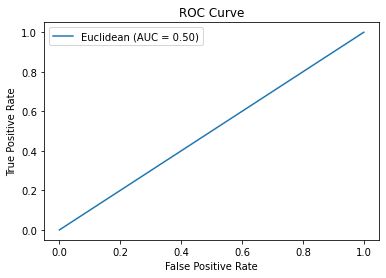

In [104]:
# Plot the ROC curves for each classifier
plt.plot(fpr_euclidean, tpr_euclidean, label='Euclidean (AUC = {:.2f})'.format(auc_euclidean))
# Add labels and legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Show the plot
plt.show()

### Testing : KNN

In [105]:
y_pred = knn.predict(df_test)

In [106]:
df_test['pred']=y_pred

In [107]:
df_test.to_csv('knn_prediction.csv',index=False)

In [108]:
df_test.drop('pred', axis=1, inplace=True)

### Parzen window

In [121]:
df['clicks_merchant'].unique()

array([ 310,  396, 2851,  314,  421,   64,   67,    4,   14,  172,   49,
        435,   20,   11,   19,   95,  312,  288,  208,   58,   54,    1,
          9,  248,    3,    2,   77,   73,   45,    7,   36,   28,   40,
         61,    5,   17,   22,   16,   21,   18,   41,    6,   13,   24,
         27,   46,   15,   35,   23,   26,   39,   12,   10,    8],
      dtype=int64)

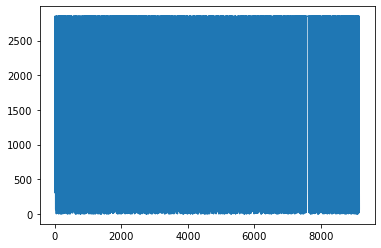

In [122]:
df['clicks_merchant'].plot()

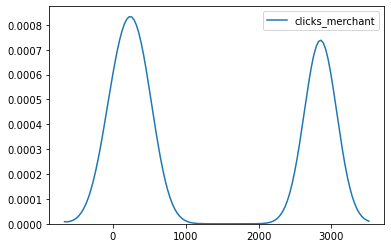

In [123]:
import seaborn as sns
sns.kdeplot(df['clicks_merchant'])

In [124]:
import numpy as np
X = df['clicks_merchant'].values[:, np.newaxis]
from sklearn.neighbors import KernelDensity
# import sklearn
kde10 = KernelDensity(kernel='gaussian', bandwidth=10)
kde10.fit(X)
kde40 = KernelDensity(kernel='gaussian', bandwidth=40)
kde40.fit(X)
kde100 = KernelDensity(kernel='gaussian', bandwidth=100)
kde100.fit(X)

KernelDensity(bandwidth=100)

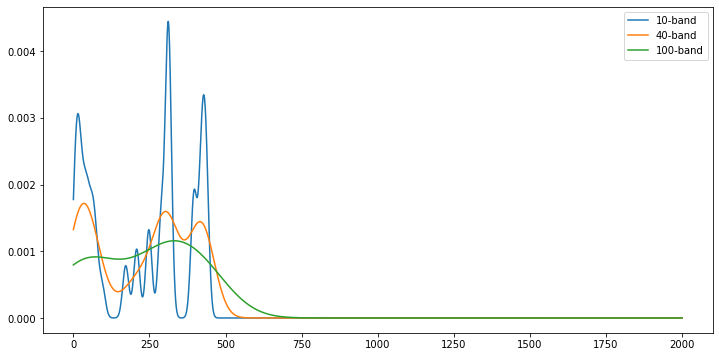

In [125]:
n2000 = np.array(list(range(0, 2001)))[:, np.newaxis]

fig, ax = plt.subplots(1, figsize=(12, 6))
ax.plot(n2000, np.exp(kde10.score_samples(n2000)), label='10-band')
ax.plot(n2000, np.exp(kde40.score_samples(n2000)), label='40-band')
ax.plot(n2000, np.exp(kde100.score_samples(n2000)), label='100-band')
ax.legend()

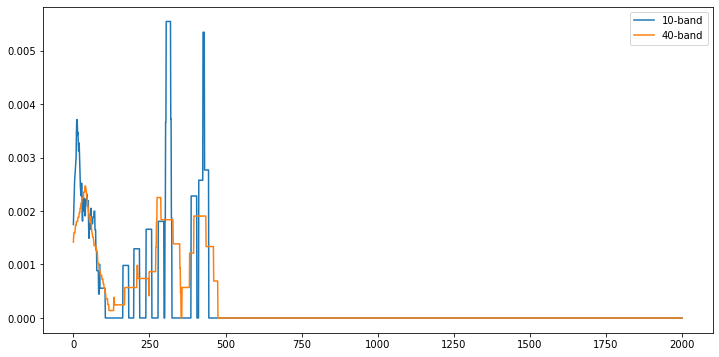

In [126]:
kde10tophat = KernelDensity(kernel='tophat', bandwidth=10).fit(X)
kde40tophat = KernelDensity(kernel='tophat', bandwidth=40).fit(X)

fig, ax = plt.subplots(1, figsize=(12, 6))
ax.plot(n2000, np.exp(kde10tophat.score_samples(n2000)), label='10-band')
ax.plot(n2000, np.exp(kde40tophat.score_samples(n2000)), label='40-band')
ax.legend()

# Naive Bayes

In [76]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
gnb = GaussianNB()

grid_search = GridSearchCV(gnb, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
gnb = GaussianNB(var_smoothing=1e-09)

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best hyperparameters: {'var_smoothing': 1e-08}
Accuracy: 0.631578947368421


In [85]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.56      0.72        16
           1       0.30      1.00      0.46         3

    accuracy                           0.63        19
   macro avg       0.65      0.78      0.59        19
weighted avg       0.89      0.63      0.68        19



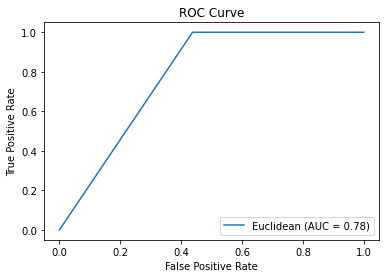

In [86]:
# Calculate the false positive rate, true positive rate, and thresholds for each classifier
fpr_euclidean, tpr_euclidean, thresholds_euclidean = roc_curve(y_test, y_pred)
# Calculate the AUC score for each classifier
auc_euclidean = roc_auc_score(y_test, y_pred)
# Plot the ROC curves for each classifier
plt.plot(fpr_euclidean, tpr_euclidean, label='Euclidean (AUC = {:.2f})'.format(auc_euclidean))
# Add labels and legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Show the plot
plt.show()

In [87]:
y_pred = gnb.predict(df_test)

ValueError: operands could not be broadcast together with shapes (4526,36) (35,) 

In [ ]:
df_test['pred']=y_pred

In [ ]:
df_test.to_csv('nb_prediction.csv',index=False)

In [88]:
df_test.drop('pred', axis=1, inplace=True)

# CNN

In [89]:
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import resample

In [90]:
# Reshape the input data for CNN
input_shape = (X_train.shape[1],)

In [91]:
# Build the CNN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=input_shape),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1, activation='sigmoid')
])

In [95]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [96]:
# Train the model
history1 = model.fit(X_train, y_train, epochs=12, batch_size=32, validation_split=0.2)

Epoch 1/12
2/2 [==============================] - 2s 454ms/step - loss: 12366.4043 - accuracy: 0.5172 - val_loss: 9083.7930 - val_accuracy: 0.4667
Epoch 2/12
2/2 [==============================] - 0s 73ms/step - loss: 6848.0312 - accuracy: 0.6552 - val_loss: 9758.7188 - val_accuracy: 0.7333
Epoch 3/12
2/2 [==============================] - 0s 72ms/step - loss: 7270.9644 - accuracy: 0.6379 - val_loss: 8367.4375 - val_accuracy: 0.7333
Epoch 4/12
2/2 [==============================] - 0s 73ms/step - loss: 8846.4004 - accuracy: 0.6034 - val_loss: 6712.5688 - val_accuracy: 0.7333
Epoch 5/12
2/2 [==============================] - 0s 76ms/step - loss: 5154.8433 - accuracy: 0.6034 - val_loss: 6201.3799 - val_accuracy: 0.7333
Epoch 6/12
2/2 [==============================] - 0s 79ms/step - loss: 6969.7925 - accuracy: 0.5862 - val_loss: 6288.5229 - val_accuracy: 0.7333
Epoch 7/12
2/2 [==============================] - 0s 75ms/step - loss: 9392.2432 - accuracy: 0.5690 - val_loss: 5695.5391 - val_

In [97]:
# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 2247.6042 - accuracy: 0.7368 - 56ms/epoch - 56ms/step

Test accuracy: 0.7368420958518982


### RNN

In [98]:
# Reshape the input data for RNN
X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

In [99]:
# Build the RNN model
model1 = keras.Sequential([
    keras.layers.LSTM(128, input_shape=(1, X_train.shape[2])),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1, activation='sigmoid')
])

In [105]:
# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [106]:
# Train the model
history2 = model1.fit(X_train, y_train, epochs=14, batch_size=32, validation_split=0.2)

Epoch 1/14
2/2 [==============================] - 7s 1s/step - loss: 0.5803 - accuracy: 0.7241 - val_loss: 0.6647 - val_accuracy: 0.7333
Epoch 2/14
2/2 [==============================] - 0s 82ms/step - loss: 0.5766 - accuracy: 0.7586 - val_loss: 0.6607 - val_accuracy: 0.7333
Epoch 3/14
2/2 [==============================] - 0s 79ms/step - loss: 0.5876 - accuracy: 0.7414 - val_loss: 0.6614 - val_accuracy: 0.7333
Epoch 4/14
2/2 [==============================] - 0s 75ms/step - loss: 0.5788 - accuracy: 0.7241 - val_loss: 0.6620 - val_accuracy: 0.7333
Epoch 5/14
2/2 [==============================] - 0s 78ms/step - loss: 0.5984 - accuracy: 0.7414 - val_loss: 0.6637 - val_accuracy: 0.7333
Epoch 6/14
2/2 [==============================] - 0s 83ms/step - loss: 0.5520 - accuracy: 0.7759 - val_loss: 0.6662 - val_accuracy: 0.6000
Epoch 7/14
2/2 [==============================] - 0s 73ms/step - loss: 0.5763 - accuracy: 0.7414 - val_loss: 0.6677 - val_accuracy: 0.6000
Epoch 8/14
2/2 [=============

In [107]:
# Evaluate the model on the testing data
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 0.4371 - accuracy: 0.8421 - 72ms/epoch - 72ms/step

Test accuracy: 0.8421052694320679


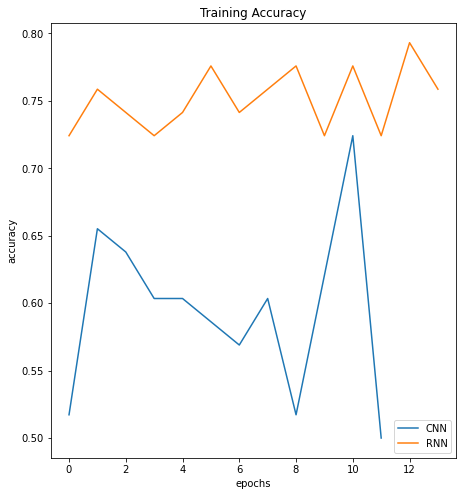

In [113]:
# Learning curves 

acc1 = history1.history['accuracy']
loss1 =history1.history['loss']

acc2 = history2.history['accuracy']
loss2 = history2.history['loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc1, label='CNN')
plt.plot(acc2, label='RNN')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

### Statistical analysis

In [86]:
import seaborn as sns

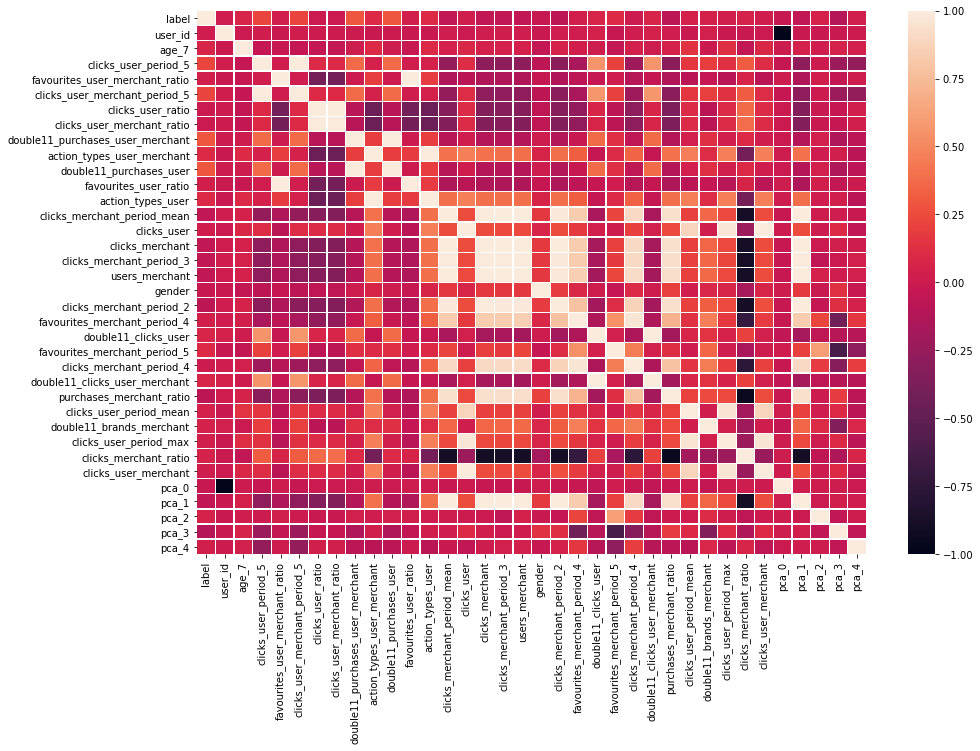

In [94]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_train.corr(), linewidths=.3)

### Insights

In [192]:
insight_df = pd.read_csv('knn_prediction.csv')

In [195]:
insight_df

,user_id,age_7,clicks_user_period_5,favourites_user_merchant_ratio,clicks_user_merchant_period_5,clicks_user_ratio,clicks_user_merchant_ratio,double11_purchases_user_merchant,action_types_user_merchant,double11_purchases_user,favourites_user_ratio,action_types_user,clicks_merchant_period_mean,clicks_user,clicks_merchant,clicks_merchant_period_3,users_merchant,gender,clicks_merchant_period_2,favourites_merchant_period_4,double11_clicks_user,favourites_merchant_period_5,clicks_merchant_period_4,double11_clicks_user_merchant,purchases_merchant_ratio,clicks_user_period_mean,double11_brands_merchant,clicks_user_period_max,clicks_merchant_ratio,clicks_user_merchant,pca_0,pca_1,pca_2,pca_3,pca_4,pred
0,64128,0,0.0,0.00,0.0,1.00,1.00,0.0,1,0.0,0.00,1,570.200000,1,2851,1130.0,1309,1,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,1.0,1.0,1,0.752839,1,150624.514147,1932.078129,-6.342981,-0.204365,-0.828412,0
1,18816,0,0.0,0.00,0.0,1.00,1.00,0.0,1,0.0,0.00,1,49.600000,1,248,48.0,159,1,49.0,0.0,0.0,1.0,21.0,0.0,0.125000,1.0,0.0,1,0.815789,1,195937.875858,-1212.552444,-8.231880,-3.074206,-6.197004,0
2,403329,0,0.0,0.00,0.0,1.00,1.00,0.0,1,0.0,0.00,1,34.400000,1,172,34.0,121,0,76.0,0.0,0.0,0.0,3.0,0.0,0.011111,1.0,0.0,1,0.955556,1,-188575.054755,-1456.918593,-32.035945,29.514069,17.190906,0
3,279681,0,0.0,0.00,0.0,1.00,1.00,0.0,1,0.0,0.00,1,5.400000,1,27,3.0,12,0,3.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,1,0.931034,1,-64926.984689,-1593.498656,-75.830243,-4.227555,-12.730230,0
4,217473,0,1.0,0.00,1.0,1.00,1.00,0.0,1,0.0,0.00,1,103.333333,1,310,1.0,227,0,0.0,0.0,1.0,11.0,24.0,1.0,0.038922,1.0,1.0,1,0.928144,1,-2719.129714,-1240.286722,88.111484,-25.966172,-58.708335,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4521,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494,0
4522,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494,0
4523,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494,0
4524,340607,0,0.0,0.25,0.0,0.75,0.75,0.0,2,0.0,0.25,2,62.400000,3,312,63.0,237,1,168.0,0.0,0.0,0.0,11.0,0.0,0.041420,3.0,1.0,3,0.923077,3,-125853.142954,-1238.112872,12.471900,74.640347,63.747494,0


In [197]:
insight_df[insight_df['pred']==1]

,user_id,age_7,clicks_user_period_5,favourites_user_merchant_ratio,clicks_user_merchant_period_5,clicks_user_ratio,clicks_user_merchant_ratio,double11_purchases_user_merchant,action_types_user_merchant,double11_purchases_user,favourites_user_ratio,action_types_user,clicks_merchant_period_mean,clicks_user,clicks_merchant,clicks_merchant_period_3,users_merchant,gender,clicks_merchant_period_2,favourites_merchant_period_4,double11_clicks_user,favourites_merchant_period_5,clicks_merchant_period_4,double11_clicks_user_merchant,purchases_merchant_ratio,clicks_user_period_mean,double11_brands_merchant,clicks_user_period_max,clicks_merchant_ratio,clicks_user_merchant,pca_0,pca_1,pca_2,pca_3,pca_4,pred
62,261771,0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,1,105.250000,1,421,105.0,336,1,4.0,6.0,0.0,15.0,86.0,0.0,0.033898,1.0,1.0,1,0.891949,1,-47017.198587,-1090.052869,103.508280,-104.686694,0.329880,1
76,372108,0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,1,48.000000,1,288,13.0,213,1,72.0,0.0,0.0,1.0,4.0,0.0,0.081571,1.0,1.0,1,0.870091,1,-157354.109979,-1320.328067,48.847518,33.879644,-1.810406,1
111,99222,0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,1,34.666667,2,208,28.0,153,0,32.0,1.0,0.0,0.0,8.0,0.0,0.029536,2.0,1.0,2,0.877637,2,115531.904322,-1295.654136,1.832254,-3.092352,-6.427797,1
112,99222,0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,1,34.666667,2,208,28.0,153,0,32.0,1.0,0.0,0.0,8.0,0.0,0.029536,2.0,1.0,2,0.877637,2,115531.904322,-1295.654136,1.832254,-3.092352,-6.427797,1
129,83352,0,0.0,0.0,0.0,0.5,0.5,0.0,2,0.0,0.0,2,52.333333,1,314,52.0,203,0,84.0,1.0,0.0,3.0,32.0,0.0,0.040698,1.0,1.0,1,0.912791,1,131401.847620,-1160.497838,15.468136,16.698381,8.409132,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,98156,0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,1,79.200000,1,396,170.0,308,0,93.0,3.0,0.0,0.0,75.0,0.0,0.009569,1.0,1.0,1,0.947368,1,116597.782678,-1013.486398,14.740304,-62.608624,71.925861,1
4450,98414,0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,1,570.200000,1,2851,1130.0,1309,2,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,1.0,1.0,1,0.752839,1,116338.517344,1917.277189,-5.997890,-0.192826,-0.849292,1
4467,98675,0,0.0,0.0,0.0,1.0,1.0,0.0,1,0.0,0.0,1,9.750000,1,39,2.0,28,1,4.0,1.0,0.0,1.0,5.0,0.0,0.046512,1.0,2.0,1,0.906977,1,116078.991480,-1498.958089,-64.955436,-6.688533,-9.867164,1
4490,44666,0,0.0,0.0,0.0,0.5,0.5,0.0,2,0.0,0.0,2,570.200000,1,2851,1130.0,1309,0,731.0,5.0,0.0,4.0,106.0,0.0,0.235015,1.0,1.0,1,0.752839,1,170086.512332,1940.479991,-6.538913,-0.210092,-0.819389,1
